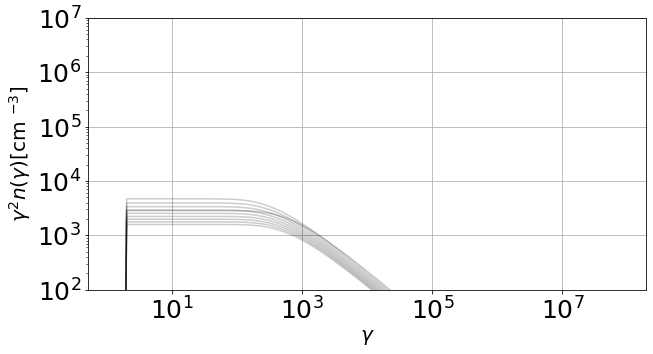

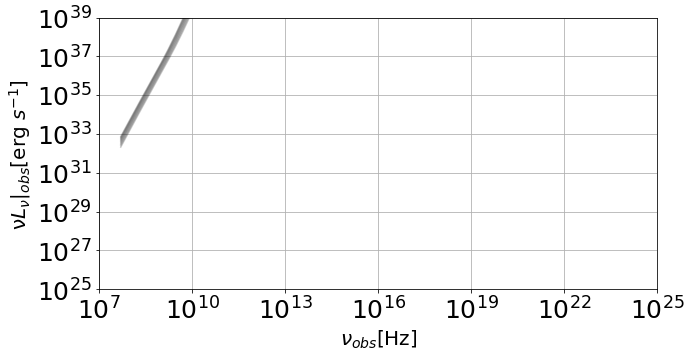

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import constants as const 

c = (const.c).cgs.value     

def replace_in_file(filename, key, new_value):
    f = open(filename, "r")
    lines = f.readlines()
    f.close()
    for i, line in enumerate(lines):
        if line.split('=')[0].strip(' \n') == key:
            lines[i] = key + ' = ' + new_value + '\n'
    f = open(filename, "w")
    f.write("".join(lines))
    f.close()
    


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(size = 25)
plt.yticks(size = 25)
El = pd.read_csv("Particles_Distribution.txt", names=["logg","logg2n"], sep=" ",  skiprows=0)
for i in range(0,int(len(El.logg)/grid_g_el)):
    plt.loglog(10**(El['logg'][i*grid_g_el :(i+1)*grid_g_el-1]),10**(2.01*El['logg'][i*grid_g_el :(i+1)*grid_g_el-1])*10**(El['logg2n'][i*grid_g_el:(i+1)*grid_g_el-1]),c="black",alpha=0.2)
plt.xlabel('$\gamma$',fontsize=20)
plt.ylabel('$\gamma^2n(\gamma)$[cm $^{-3}]$',fontsize=20)
plt.ylim(10**(2.),10**7.)
plt.grid()


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(size = 25)
plt.yticks(size = 25)
Ph = pd.read_csv("Photons_Distribution.txt", names=["logn","logph"], sep=" ",  skiprows=0)
Ph["t_obs"] = np.nan
for i in range(0,int(len(Ph.logn)/grid_nu)):
    plt.loglog(10**(Ph['logn'][i*grid_nu :(i+1)*grid_nu-1])*delta,10**(Ph['logph'][i*grid_nu:(i+1)*grid_nu-1])*delta**4.,c="black",alpha=0.2)
    Ph["t_obs"][i*grid_nu :(i+1)*grid_nu-1] = i*step_alg*R0/c
plt.ylim(10**25.,10**39.)
plt.xlim(10**7.,10**25.)
plt.xlabel('$ν_{obs}$[Hz]',fontsize=20)
plt.ylabel('ν$L_{ν}|_{obs}$[erg $s^{-1}]$',fontsize=20)
plt.grid()